## Importing Libraries and reading in CSV file

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/salary_model.csv')

## Initial Data Exploration of count and Dtypes

In [ ]:
print(df.info())
print()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0    work_year          14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14191 non-null  object
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.3+ MB
None



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
5,2024,Mid-level,Full-time,Data Science,46203,GBP,57753,United Kingdom,In-person,United Kingdom,M,Data Science and Research
6,2024,Mid-level,Full-time,Data Science,38280,GBP,47850,United Kingdom,In-person,United Kingdom,M,Data Science and Research
7,2024,Entry-level,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering


## Checking salary column as to why the total count differs from all of the other columns

In [ ]:
# Trying to convert salary to float as it should be numerical, not an object

df['salary'] = df['salary'].astype('float')

ValueError: could not convert string to float: '238,000'

In [ ]:
# Removing comma from 238,000 and trying to convert to float again

df['salary'].replace({",":""}, regex=True, inplace=True)
df['salary'] = df['salary'].astype('float')

ValueError: could not convert string to float: '$154000 '

In [ ]:
# Removing "$" from $154000 and trying to convert to float again

df['salary'].replace({"\$":""}, regex=True, inplace=True)
df['salary'] = df['salary'].astype('float')

In [ ]:
# Checking for missing values for all columns

df.isnull().sum()

 work_year            0
experience_level      0
employment_type       0
job_title             0
salary                8
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [ ]:
# Replacing missing values with the mean of the salary column and rounding to 2 decimal places

df['salary'] = df['salary'].transform(lambda x: x.fillna(x.mean())).round(2)

In [ ]:
# Re-checking the count of missing values in the salary column

print("The number of missing values in the salary column is:", df['salary'].isnull().sum())

The number of missing values in the salary column is: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0    work_year          14199 non-null  int64  
 1   experience_level    14199 non-null  object 
 2   employment_type     14199 non-null  object 
 3   job_title           14199 non-null  object 
 4   salary              14199 non-null  float64
 5   salary_currency     14199 non-null  object 
 6   salary_in_usd       14199 non-null  int64  
 7   employee_residence  14199 non-null  object 
 8   work_setting        14199 non-null  object 
 9   company_location    14199 non-null  object 
 10  company_size        14199 non-null  object 
 11  job_category        14199 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


## Running Descriptive Statistics on Salary

In [ ]:
df['salary'].describe()

count     14199.000000
mean     149006.380452
std       64875.217695
min           0.000000
25%      102100.000000
50%      142000.000000
75%      185900.000000
max      450000.000000
Name: salary, dtype: float64

## Pulling row where salary value is 0

In [ ]:
df.loc[df['salary'] == 0]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
10126,2023,Senior,Full-time,Data Analyst,0.0,USD,116000,United States,Remote,United States,M,Data Analysis


## Salary should be 116000 based on salary_in_usd column, so replacing the 0 with that value

In [ ]:
df['salary'] = df['salary'].replace(0, 116000)

In [ ]:
df['salary'].describe()

count     14199.000000
mean     149014.550042
std       64863.755133
min       14000.000000
25%      102150.000000
50%      142000.000000
75%      185900.000000
max      450000.000000
Name: salary, dtype: float64

## Checking unique values for each column

In [ ]:
# Printing this column's unique values out individually as its dtype is not object

print(f"WORK YEAR Unique Values: {df.work_year.unique()}")
print()

AttributeError: 'DataFrame' object has no attribute 'work_year'

## Checking column names to explore why work_year is throwing an error

In [ ]:
df.columns

Index([' work_year ', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

In [ ]:
# Removing the spaces in the work_year column name

df = df.rename(columns={' work_year ': 'work_year'})

In [ ]:
# Re-running code to print out unique values

print(f"WORK YEAR Unique Values: {df.work_year.unique()}")
print()

WORK YEAR Unique Values: [2024 2023 2022 2020 2021]



## Checking Unique Values of columns where dtype is "Object"

In [ ]:
# This loop checks the dtype of each column and produces the unique values if the column dtype matches object
# Otherwise it passes and moves on to the next column to check

for column in df.columns:
  if df.dtypes[column] == "object":
    print (f"{column.upper()} Unique Values: {df[column].unique()}")
    print()
  else:
    pass

EXPERIENCE_LEVEL Unique Values: ['Entry-level' 'Executive' 'Senior' 'Mid-level']

EMPLOYMENT_TYPE Unique Values: ['Freelance' 'Full-time' 'Fulltime' 'Contract' 'Part-time' 'full-time']

JOB_TITLE Unique Values: ['Applied Data Scientist' 'Business Intelligence' 'Data Architect'
 'Data Science' 'Insight Analyst' 'Data Engineer' 'Research Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer' 'Data Scientist'
 'Research Engineer' 'BI Developer' 'Data Analyst'
 'Business Intelligence Engineer' 'Data Quality Engineer'
 'Machine Learning Engineer' 'Cloud Database Engineer' 'Head of Data'
 'BI Analyst' 'Data Manager' 'Computational Biologist'
 'Data Integration Specialist' 'Data Science Manager' 'AI Engineer'
 'Applied Scientist' 'BI Data Analyst' 'AI Research Scientist'
 'MLOps Engineer' 'Research Analyst' 'Admin & Data Analyst'
 'Business Intelligence Manager' 'Data Developer' 'Prompt Engineer'
 'Data Specialist' 'Data Integration Engineer' 'Data Science Analyst'
 'Data Analytics 

## Cleaning of Employment Type column values

In [ ]:
# Fixing column values in the Employment Type for consistency by capitalizing lower case values and fixing the value that is missing a "-"

df['employment_type'] = df['employment_type'].str.capitalize()
df['employment_type'] = df['employment_type'].str.replace('Fulltime', 'Full-time')

# Verifying the changes applied correctly

df['employment_type'].value_counts()

employment_type
Full-time    14139
Contract        26
Part-time       22
Freelance       12
Name: count, dtype: int64

## Cleaning of Company Size column values

In [ ]:
# Fixing the Company Size column to make sure each value is consistent in casing

df['company_size'] = df['company_size'].str.capitalize()

# Verifying the changes were applied correctly

df['company_size'].value_counts()

company_size
M    13112
L      919
S      168
Name: count, dtype: int64

## Filtering out data based on USD salary info

In [ ]:
# This filters out only rows that are pertaining to USD salary information and the company being located in the United States

usd_salary_df = df[((df['salary_currency'] == "USD") & (df['employee_residence'] == 'United States'))]

# Checking value counts for various columns to determine if any can be removed from the dataset

print(usd_salary_df['company_location'].value_counts())
print()
print(usd_salary_df['employment_type'].value_counts())
print()
print(usd_salary_df['employee_residence'].value_counts())
print()
print(usd_salary_df['salary_currency'].value_counts())
print()
print(usd_salary_df['experience_level'].value_counts())

company_location
United States    12398
Canada               2
Japan                1
Australia            1
Germany              1
France               1
Name: count, dtype: int64

employment_type
Full-time    12381
Contract        14
Part-time        9
Name: count, dtype: int64

employee_residence
United States    12404
Name: count, dtype: int64

salary_currency
USD    12404
Name: count, dtype: int64

experience_level
Senior         8555
Mid-level      2693
Entry-level     793
Executive       363
Name: count, dtype: int64


## Filtering out non-United States company locations

In [ ]:
usd_salary_df = df[((df['company_location'] == "United States"))]

print(usd_salary_df['company_location'].value_counts())

company_location
United States    12465
Name: count, dtype: int64


## Dropping columns that are no longer needed

In [ ]:
# Dropping the company_location as we are only looking at locations located in the United States
# Dropping the employee_residence column as we are only looking at employees who reside in the United States
# Dropping the salary_currency column as this column only contains the value "USD"
# Dropping the salary_in_usd column as we already filtered the salary column by salaries in the United States, so this column is redundant data

usd_salary_df = usd_salary_df.drop({'company_location', 'employee_residence', 'salary_currency', 'salary_in_usd'}, axis=1)

In [ ]:
df_u=usd_salary_df
usd_salary_df.head(15)

,work_year,experience_level,employment_type,job_title,salary,work_setting,company_size,job_category
1,2024,Executive,Full-time,Business Intelligence,230000.00,In-person,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900.00,In-person,M,BI and Visualization
7,2024,Entry-level,Full-time,Insight Analyst,50000.00,Remote,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000.00,Remote,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000.00,In-person,M,Data Engineering
10,2024,Senior,Full-time,Data Engineer,148000.00,In-person,M,Data Engineering
11,2024,Senior,Full-time,Research Scientist,234000.00,In-person,M,Data Science and Research
12,2024,Senior,Full-time,Research Scientist,146000.00,In-person,M,Data Science and Research
13,2024,Entry-level,Full-time,Business Intelligence Analyst,192300.00,In-person,M,BI and Visualization
14,2024,Entry-level,Full-time,Business Intelligence Analyst,120200.00,In-person,M,BI and Visualization


## Exploratory Data Analysis (EDA)

## Removing 'job Title' column

In [ ]:
usd_salary_df = usd_salary_df.drop('job_title', axis=1)

## Ensuring the column has been removed

In [ ]:
usd_salary_df.head(15)

,work_year,experience_level,employment_type,salary,work_setting,company_size,job_category
1,2024,Executive,Full-time,230000.00,In-person,M,BI and Visualization
2,2024,Executive,Full-time,176900.00,In-person,M,BI and Visualization
7,2024,Entry-level,Full-time,50000.00,Remote,M,Data Analysis
8,2024,Entry-level,Full-time,40000.00,Remote,M,Data Analysis
9,2024,Senior,Full-time,276000.00,In-person,M,Data Engineering
10,2024,Senior,Full-time,148000.00,In-person,M,Data Engineering
11,2024,Senior,Full-time,234000.00,In-person,M,Data Science and Research
12,2024,Senior,Full-time,146000.00,In-person,M,Data Science and Research
13,2024,Entry-level,Full-time,192300.00,In-person,M,BI and Visualization
14,2024,Entry-level,Full-time,120200.00,In-person,M,BI and Visualization


## Summary statistics of numerical variables

In [ ]:
summary_stats = usd_salary_df.describe()
print(summary_stats)

          work_year         salary
count  12465.000000   12465.000000
mean    2023.141998  156454.438752
std        0.644336   61523.413919
min     2020.000000   20000.000000
25%     2023.000000  112000.000000
50%     2023.000000  148350.000000
75%     2024.000000  191200.000000
max     2024.000000  450000.000000


## Salary Histogram and Box plot

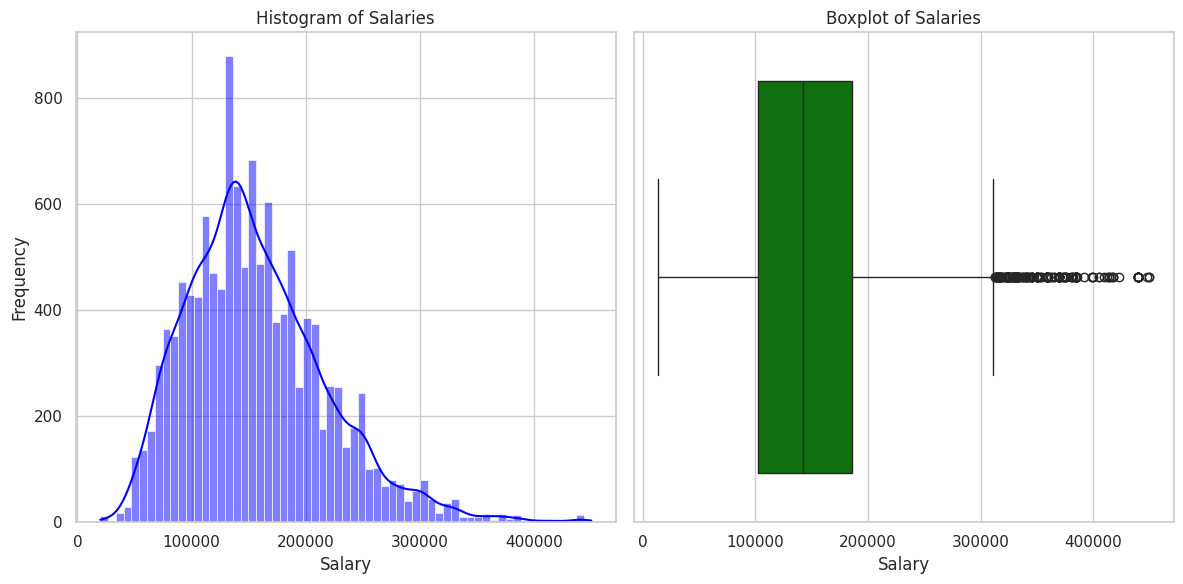

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(usd_salary_df['salary'], kde=True, color='blue')
plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Create a boxplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['salary'], color='green')
plt.title('Boxplot of Salaries')
plt.xlabel('Salary')

# Display the plots
plt.tight_layout()
plt.show()

## Key Insights for Predicting Salary:

The histogram indicates that the majority of salaries fall within a specific range, providing a baseline for salary prediction.
The box plot allows us to identify outliers, which may need to be addressed in the salary prediction model.

## Average Salary Distribution by Category

<ipython-input-62-de6b9e000723>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-62-de6b9e000723>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


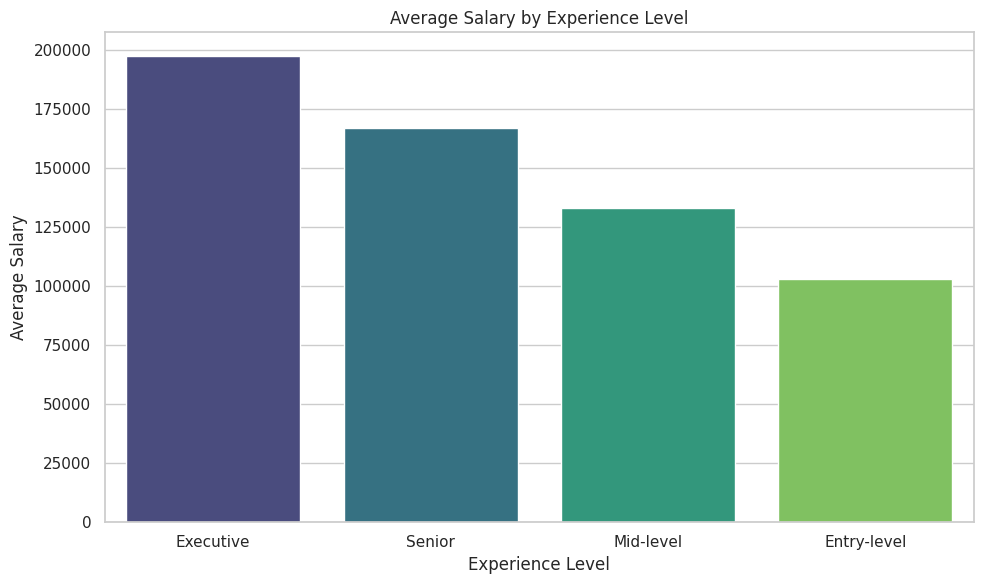

<ipython-input-62-de6b9e000723>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-62-de6b9e000723>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


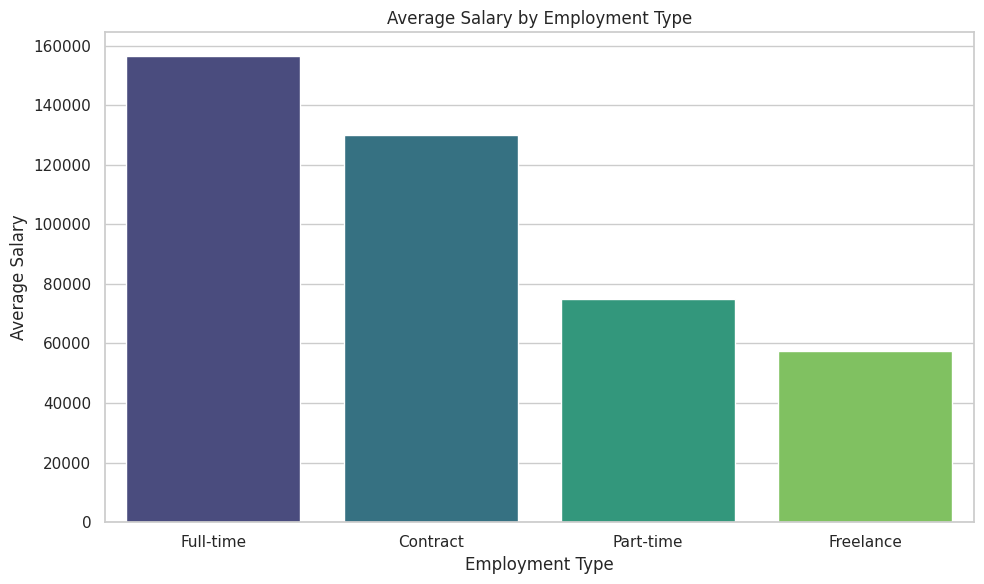

<ipython-input-62-de6b9e000723>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-62-de6b9e000723>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


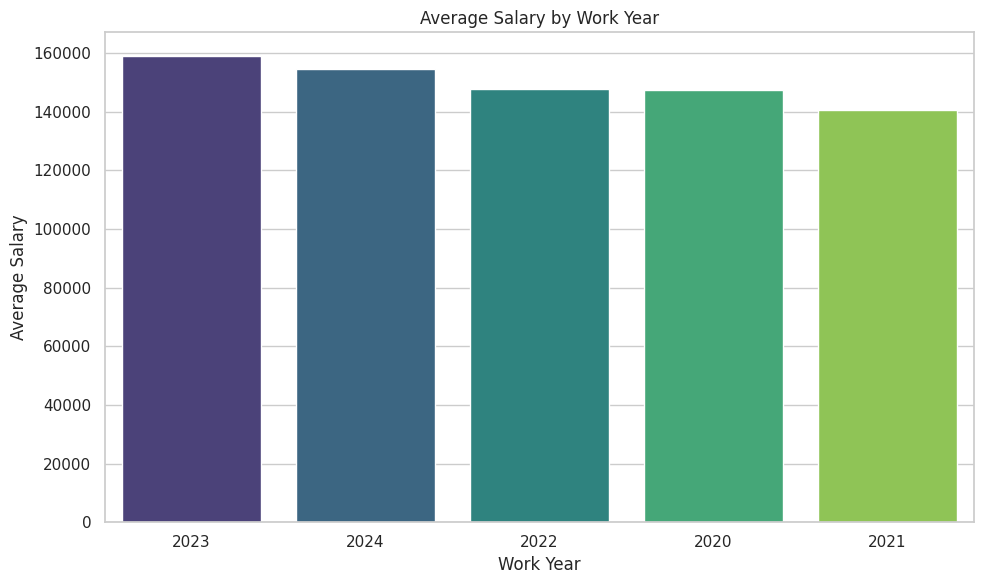

<ipython-input-62-de6b9e000723>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-62-de6b9e000723>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


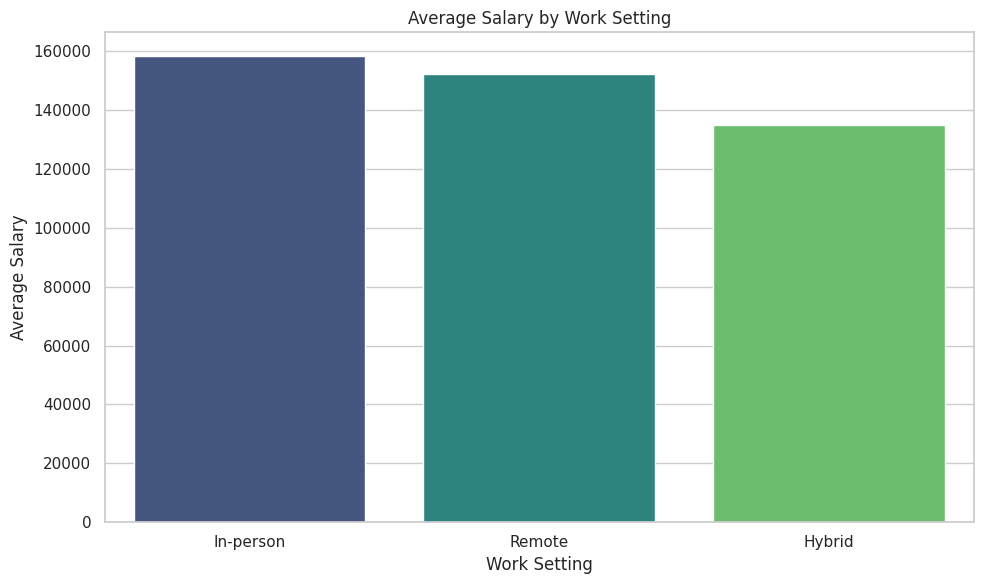

<ipython-input-62-de6b9e000723>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-62-de6b9e000723>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


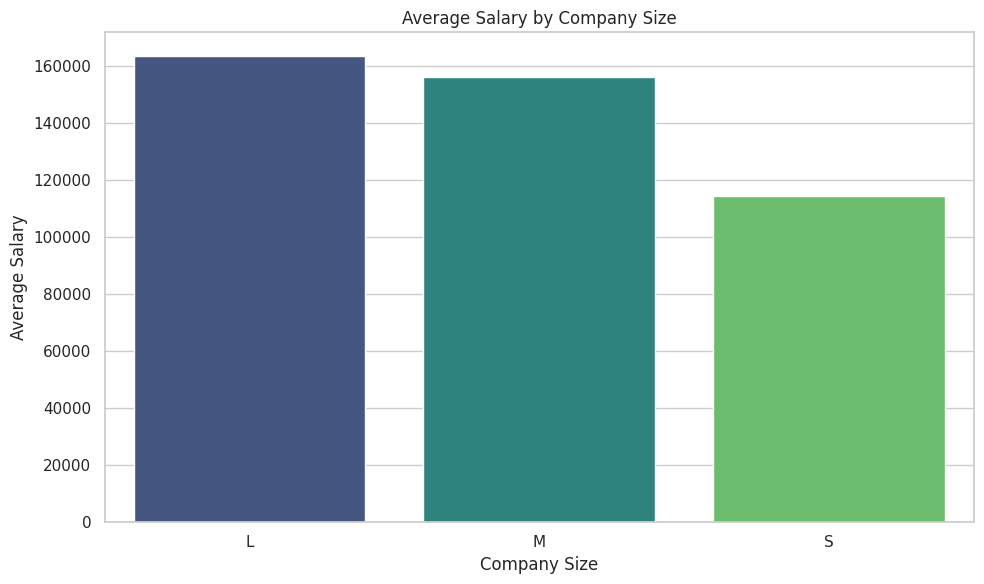

<ipython-input-62-de6b9e000723>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-62-de6b9e000723>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


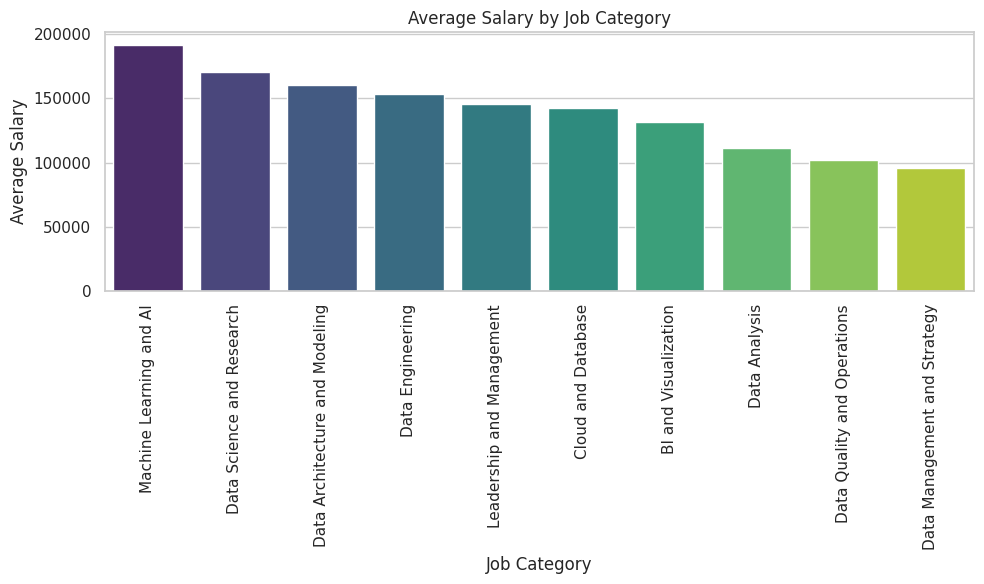

In [ ]:
# Define a function to create bar plots for salary across different categories
def plot_salary_by_category(category, data, rotation=0):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=category,
        y='salary',
        data=data,
        estimator=np.mean,
        ci=None,
        palette='viridis',
        order=data.groupby(category)['salary'].mean().sort_values(ascending=False).index
    )
    plt.title(f'Average Salary by {category.title().replace("_", " ")}')
    plt.xlabel(category.title().replace("_", " "))
    plt.ylabel('Average Salary')
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

# Plotting bar plots for each category
categories = ['experience_level', 'employment_type', 'work_year', 'work_setting', 'company_size', 'job_category']

for category in categories:
    plot_salary_by_category(category, usd_salary_df, rotation=90 if category in ['job_title', 'job_category'] else 0)

## Salary Distribution by Category

<ipython-input-63-92f75a2708ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


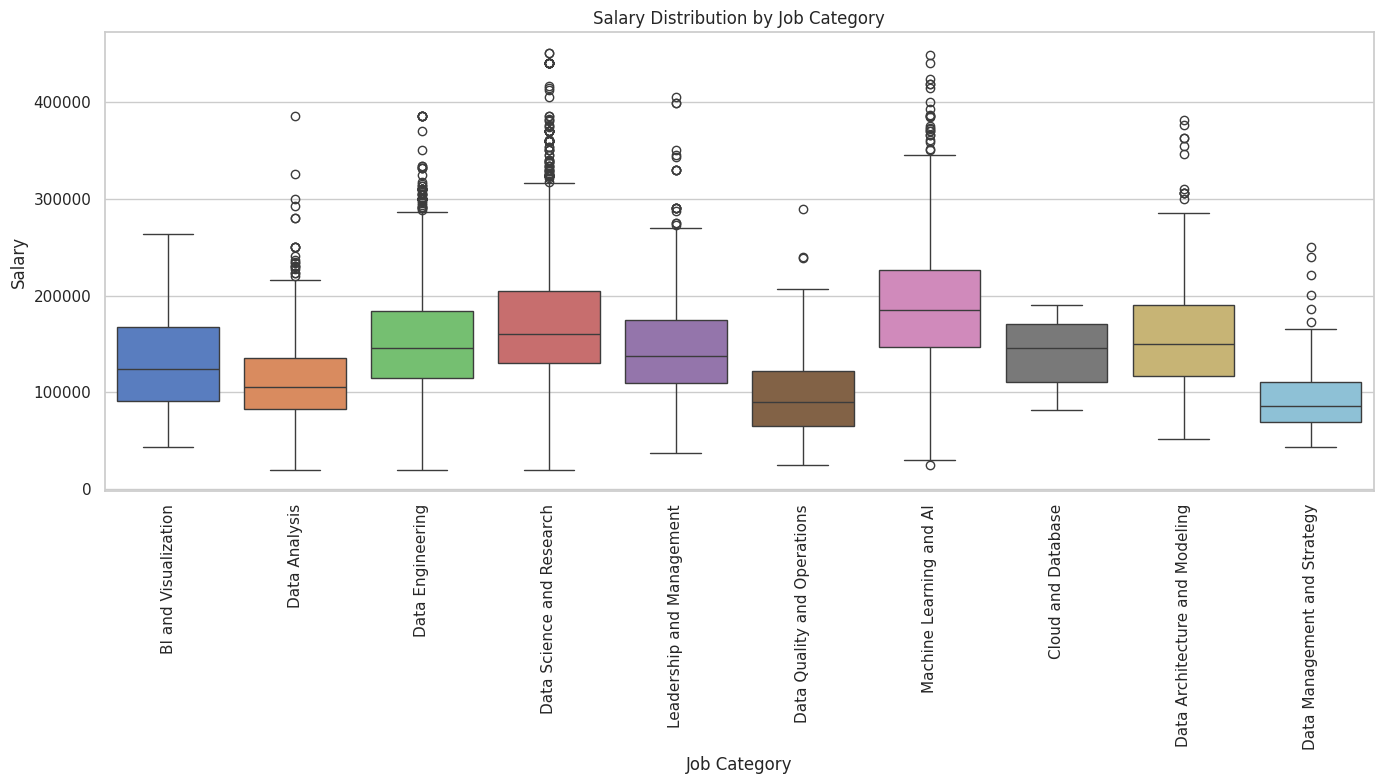

<ipython-input-63-92f75a2708ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


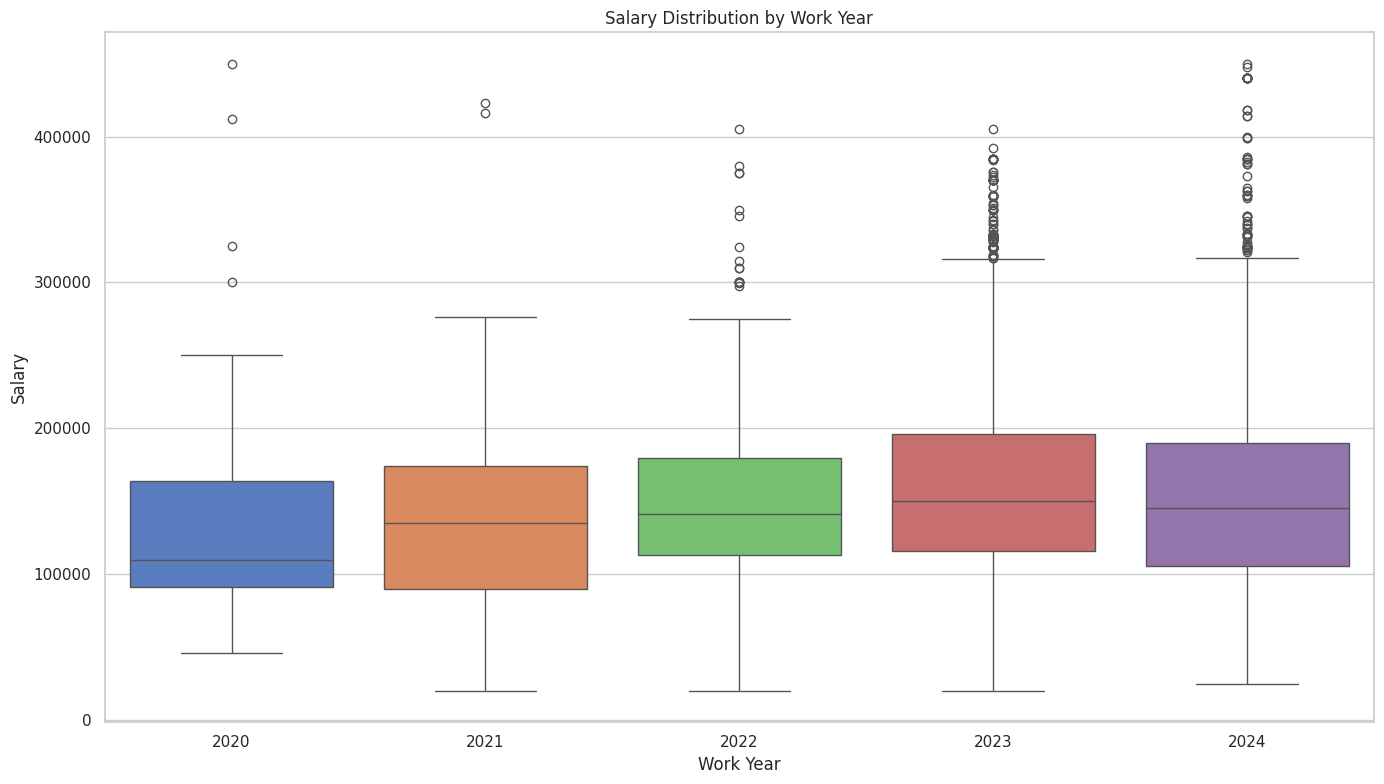

<ipython-input-63-92f75a2708ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


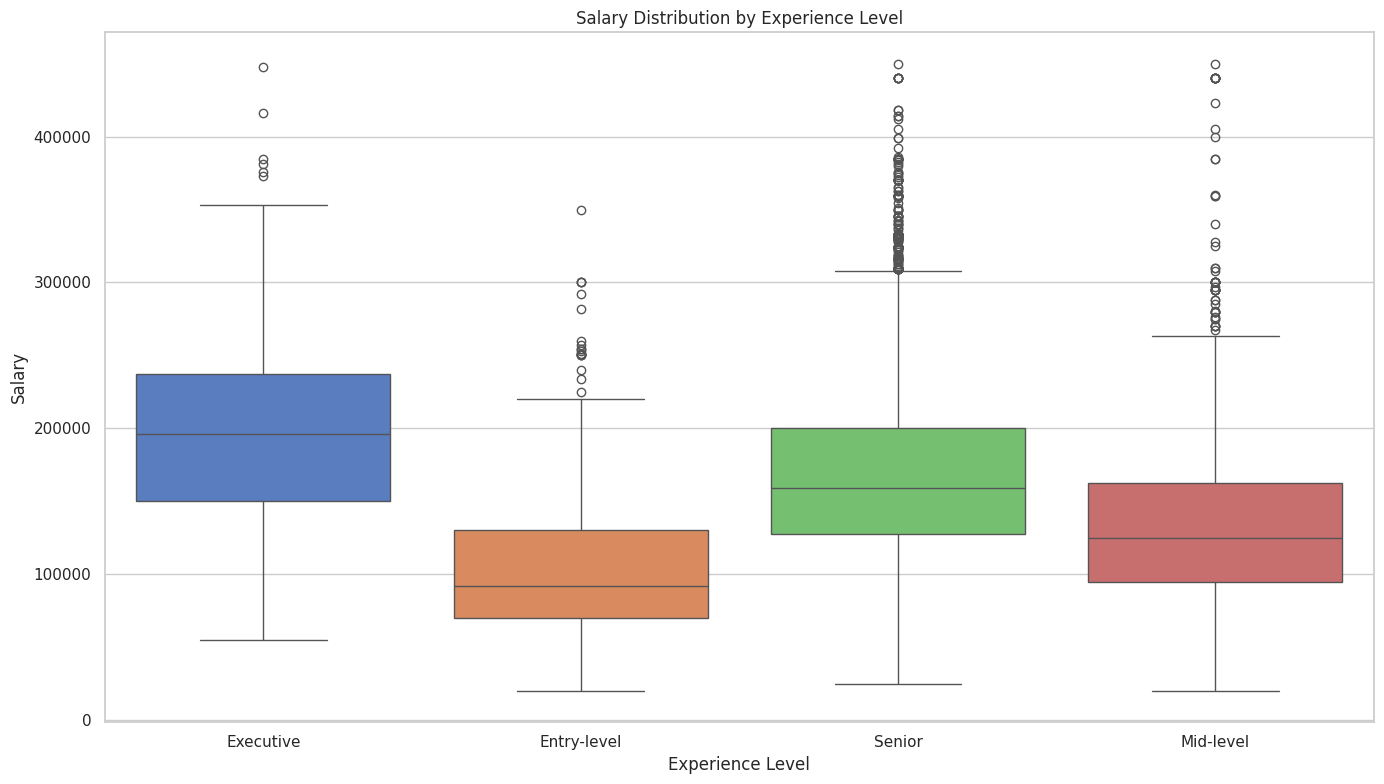

<ipython-input-63-92f75a2708ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


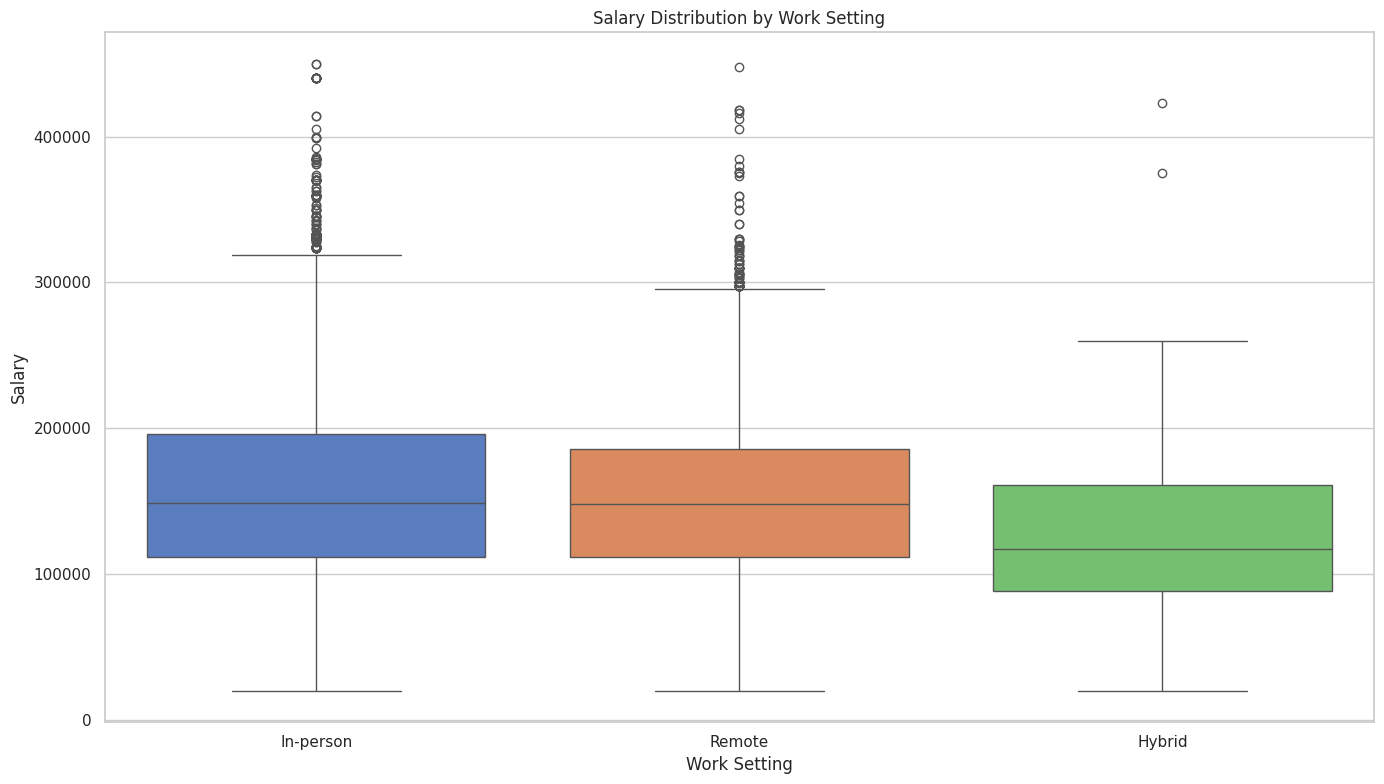

<ipython-input-63-92f75a2708ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


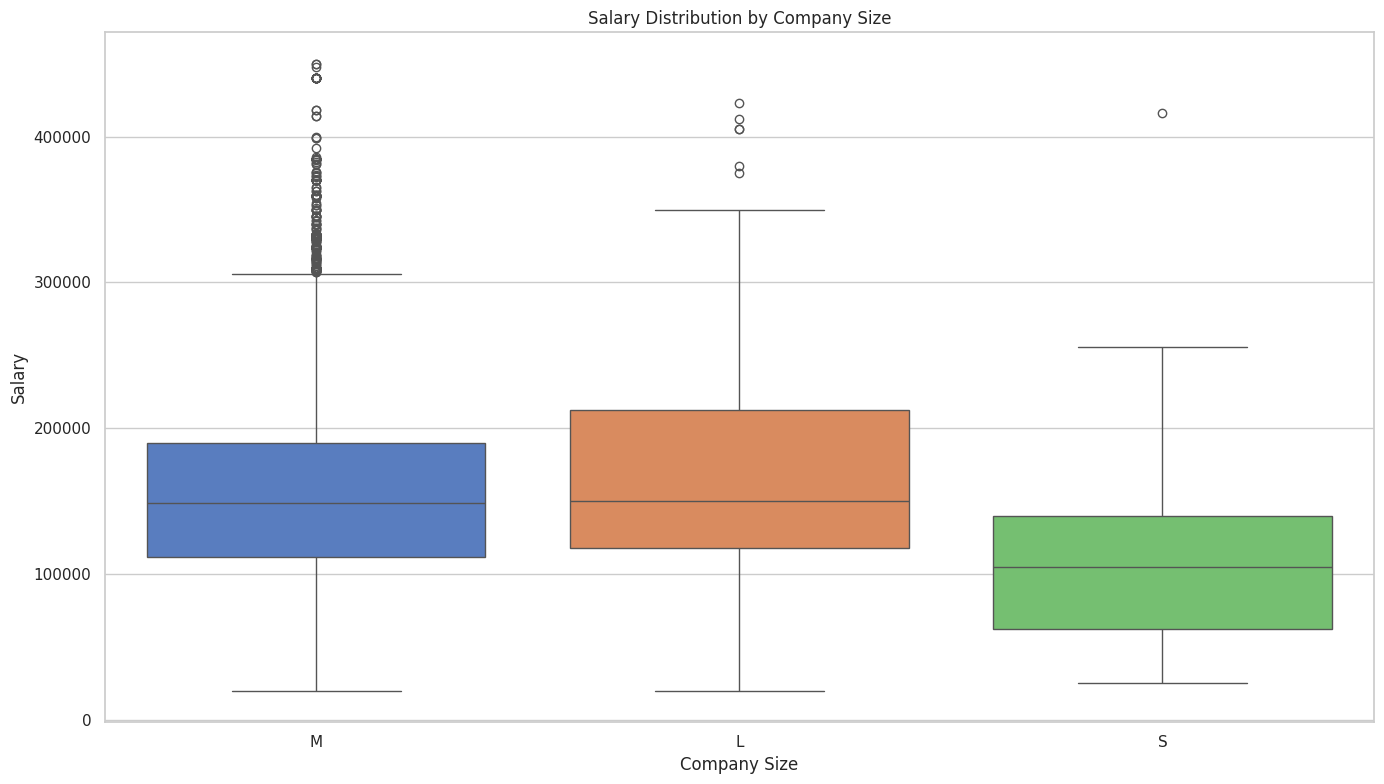

<ipython-input-63-92f75a2708ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


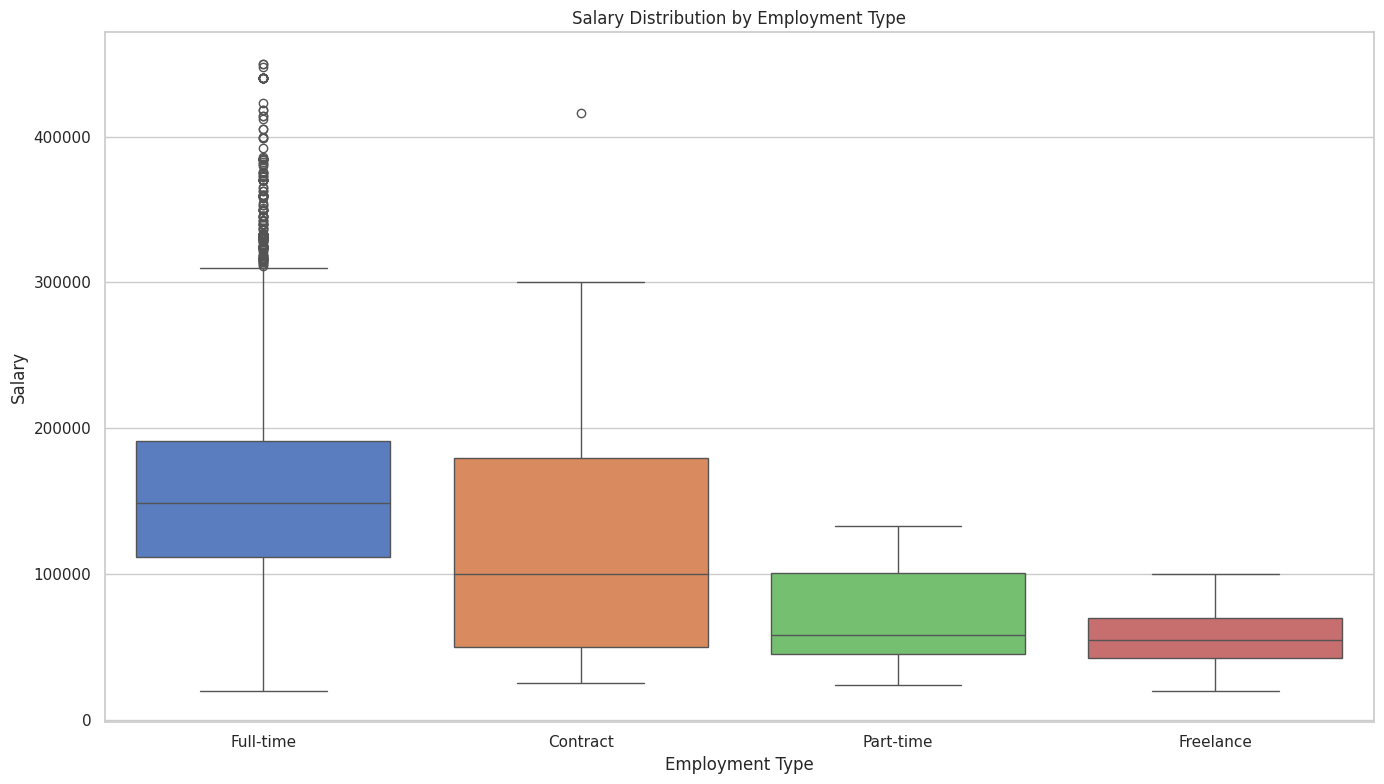

In [ ]:
# Define a function to create boxplots for salary distribution across different categories
def plot_salary_distribution_by_category(category, data, rotation=0):
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        x=category,
        y='salary',
        data=data,
        palette='muted'
    )
    plt.title(f'Salary Distribution by {category.title().replace("_", " ")}')
    plt.xlabel(category.title().replace("_", " "))
    plt.ylabel('Salary')
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

# Plotting boxplots for each category
categories = ['job_category', 'work_year', 'experience_level', 'work_setting', 'company_size', 'employment_type']

for category in categories:
    plot_salary_distribution_by_category(category, usd_salary_df, rotation=90 if category in ['job_category'] else 0)

# **ENCODING**

## ORDINAL: Work year, Experience Level, Employment type, Work Setting, Company size

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define mappings
experience_levels = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
employment_types = ['Freelance', 'Part-time', 'Full-time', 'Contract']
work_settings = ['Remote', 'Hybrid', 'In-person']
company_sizes = ['S', 'M', 'L']

# Create the encoder instance
ordinal_encoder = OrdinalEncoder(categories=[sorted(usd_salary_df['work_year'].unique()), experience_levels, employment_types, work_settings, company_sizes])

# Select the columns to encode
ordinal_cols = ['work_year', 'experience_level', 'employment_type', 'work_setting', 'company_size']
usd_salary_df[ordinal_cols] = ordinal_encoder.fit_transform(usd_salary_df[ordinal_cols])

# Check the transformation
print(usd_salary_df[ordinal_cols].head())


   work_year  experience_level  employment_type  work_setting  company_size
1        4.0               3.0              2.0           2.0           1.0
2        4.0               3.0              2.0           2.0           1.0
7        4.0               0.0              2.0           0.0           1.0
8        4.0               0.0              2.0           0.0           1.0
9        4.0               2.0              2.0           2.0           1.0


## ONE-HOT ENCODING: Job Category

In [ ]:
# Apply one-hot encoding to 'job_category'
job_category_one_hot = pd.get_dummies(usd_salary_df['job_category'], prefix='category')

# Concatenate the new columns to the original DataFrame
usd_salary_df = pd.concat([usd_salary_df, job_category_one_hot], axis=1)

# drop the original 'job_category' column
usd_salary_df.drop('job_category', axis=1, inplace=True)

# Check the DataFrame with new one-hot encoded columns
print(usd_salary_df.head())


   work_year  experience_level  employment_type    salary  work_setting  \
1        4.0               3.0              2.0  230000.0           2.0   
2        4.0               3.0              2.0  176900.0           2.0   
7        4.0               0.0              2.0   50000.0           0.0   
8        4.0               0.0              2.0   40000.0           0.0   
9        4.0               2.0              2.0  276000.0           2.0   

   company_size  category_BI and Visualization  category_Cloud and Database  \
1           1.0                           True                        False   
2           1.0                           True                        False   
7           1.0                          False                        False   
8           1.0                          False                        False   
9           1.0                          False                        False   

   category_Data Analysis  category_Data Architecture and Modeling  \
1   

## Correlation Analysis

salary                                     1.000000
experience_level                           0.336828
category_Machine Learning and AI           0.239611
category_Data Science and Research         0.159244
work_setting                               0.047011
company_size                               0.042575
employment_type                            0.028643
work_year                                  0.019330
category_Data Architecture and Modeling    0.012728
category_Cloud and Database               -0.006587
category_Data Engineering                 -0.026469
category_Leadership and Management        -0.042647
category_Data Quality and Operations      -0.064502
category_BI and Visualization             -0.083977
category_Data Management and Strategy     -0.087297
category_Data Analysis                    -0.309971
Name: salary, dtype: float64


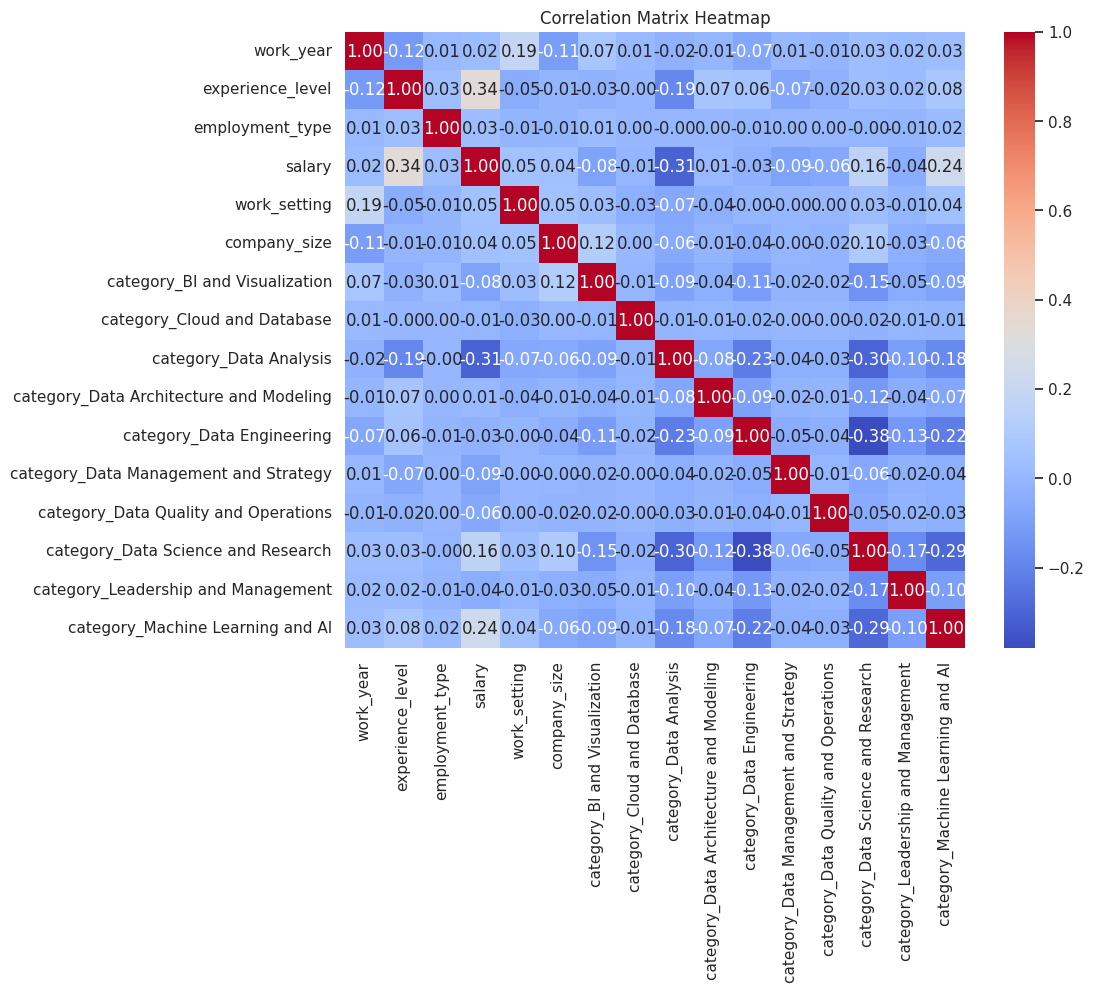

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation Matrix
corr_matrix = usd_salary_df.corr()

# Print the correlation with target column to see the numerical values
print(corr_matrix['salary'].sort_values(ascending=False))

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add labels and title for clarity
plt.title('Correlation Matrix Heatmap')
plt.show()

# **BUILDING MODELS**

# Ridge Regression

## 1st Iteration:
Steps:
Prepare Data: Split the data into training and testing sets.

Train Model:  Ridge regression model.

Evaluate Model: Assess its performance using metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = usd_salary_df.drop('salary', axis=1)
y = usd_salary_df['salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)

RMSE: 53059.83424031529
R^2 Score: 0.2498462266201683


## 2nd Iteration: Handling Outliers in Salary
Steps:
Modify Data: Replace outliers in the salary column.

Train and Evaluate Model: Using the same steps as the first iteration.

In [ ]:
# Replace outliers in the salary column
usd_salary_df['salary'] = usd_salary_df['salary'].apply(lambda x: min(x, 310000))

# Re-split the data (this step is necessary as the target has changed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the Ridge model
ridge_model.fit(X_train, y_train)

# Re-predict and re-evaluate
y_pred = ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE with Outlier Adjustment:", rmse)
print("R^2 Score with Outlier Adjustment:", r2)

RMSE with Outlier Adjustment: 53059.83424031529
R^2 Score with Outlier Adjustment: 0.2498462266201683


## 3rd Iteration: Feature Importance and Model Simplification

Steps:
Identify Feature Importance: Using model coefficients.

Select Top 3 Features: Based on the largest coefficients.

Rebuild and Train Model: Using only top features.

Evaluate Model Performance.

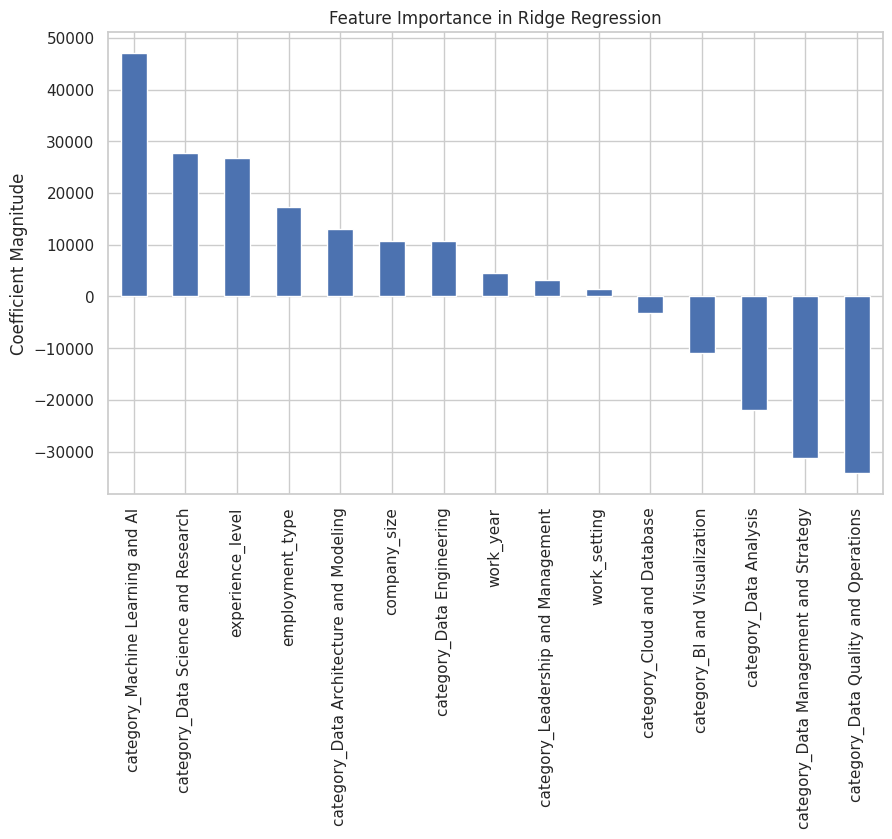

Top 3 features with positive impact from Ridge Regression: Index(['category_Machine Learning and AI',
       'category_Data Science and Research', 'experience_level'],
      dtype='object')
RMSE with Top 3 Positive Features: 54160.19601462955
R^2 Score with Top 3 Positive Features: 0.2184100340321904


In [ ]:
# Plotting feature importance for Ridge regression
feature_importance_ridge = pd.Series(index=X_train.columns, data=ridge_model.coef_).sort_values(ascending=False)
feature_importance_ridge.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Ridge Regression')
plt.ylabel('Coefficient Magnitude')
plt.show()


# Filter to get only features with a positive impact
positive_feature_importance_ridge = feature_importance_ridge[feature_importance_ridge > 0]

# Get the top 3 features with the highest positive impact
top_3_positive_features_ridge = positive_feature_importance_ridge.nlargest(3).index
print("Top 3 features with positive impact from Ridge Regression:", top_3_positive_features_ridge)


# Split the dataset with only the top 3 features
X_top3 = X[top_3_positive_features_ridge]

# Split the data into training and testing sets with only the top 3 features
X_train_top3, X_test_top3, y_train, y_test = train_test_split(X_top3, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model
ridge_model_top3 = Ridge(alpha=1.0)

# Train the model using the top 3 positive features
ridge_model_top3.fit(X_train_top3, y_train)

# Predict on the test set using the top 3 positive features
y_pred_top3 = ridge_model_top3.predict(X_test_top3)

# Evaluate the model
rmse_top3 = np.sqrt(mean_squared_error(y_test, y_pred_top3))
r2_top3 = r2_score(y_test, y_pred_top3)

print("RMSE with Top 3 Positive Features:", rmse_top3)
print("R^2 Score with Top 3 Positive Features:", r2_top3)

# LASSO REGRESSION

## 1st Iteration:
Steps:

Prepare Data: Split the data into training and testing sets.

Train Model: Use a LASSO regression model.

Evaluate Model: Assess its performance using evaluation metrics

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = usd_salary_df.drop('salary', axis=1)
y = usd_salary_df['salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LASSO regression model
lasso_model = Lasso(alpha=10, max_iter=15000)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)


RMSE: 50540.560299716315
R^2 Score: 0.26220267260895525


## 2nd Iteration: Handling Outliers in Salary
Steps:

Modify Data: Replace outliers in the salary column.

Train and Evaluate Model: Using the same steps as the first iteration.

In [ ]:
# Replace outliers in the salary column
usd_salary_df['salary'] = usd_salary_df['salary'].apply(lambda x: min(x, 310000))

# Re-split the data (this step is necessary as the target has changed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the LASSO model
lasso_model.fit(X_train, y_train)

# Re-predict and re-evaluate
y_pred = lasso_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE with Outlier Adjustment:", rmse)
print("R^2 Score with Outlier Adjustment:", r2)

RMSE with Outlier Adjustment: 50540.560299716315
R^2 Score with Outlier Adjustment: 0.26220267260895525


## 3rd Iteration: Feature Importance and Model Simplification
Steps:

Identify Feature Importance: Using model coefficients from the LASSO model.

Select Top 3 Features: Based on the largest positive coefficients.

Rebuild and Train Model: Using only top features.

Evaluate Model Performance.

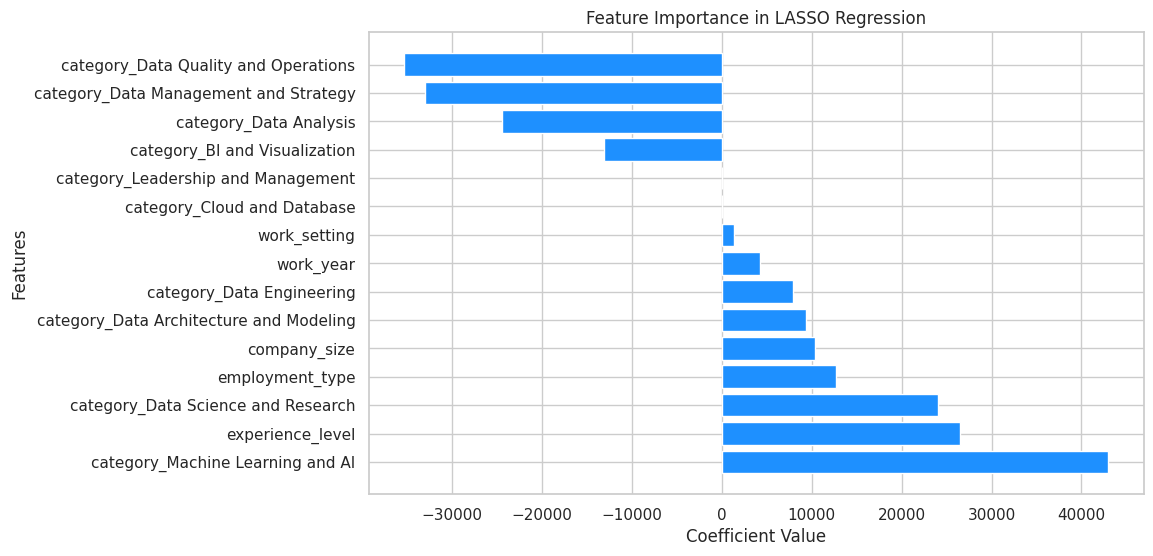

Top 3 features with positive impact from LASSO Regression: 14      category_Machine Learning and AI
1                       experience_level
12    category_Data Science and Research
Name: Feature, dtype: object
RMSE with Top 3 Features: 51675.35321658346
R² Score with Top 3 Features: 0.22869902409319398


In [ ]:

# Get feature importances (coefficients) from the LASSO model
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})

# Sorting the DataFrame based on coefficient values for better visualization
sorted_feature_importance_df = feature_importance_df.sort_values('Coefficient', ascending=False)

# Creating the bar chart for all coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Coefficient'], color='dodgerblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in LASSO Regression')
plt.show()

# Filter to get only features with a positive impact
positive_feature_importance = feature_importance_df[feature_importance_df['Coefficient'] > 0]
top_3_positive_features = positive_feature_importance.nlargest(3, 'Coefficient')['Feature']
print("Top 3 features with positive impact from LASSO Regression:", top_3_positive_features)

# Train a new model using only the top 3 features
X_train_top3 = X_train[top_3_positive_features]
X_test_top3 = X_test[top_3_positive_features]

lasso_model_top3 = Lasso(alpha=0.01, max_iter=10000)
lasso_model_top3.fit(X_train_top3, y_train)

# Predict on the test set using the top 3 positive features
y_pred_top3 = lasso_model_top3.predict(X_test_top3)

# Evaluate the model
rmse_top3 = np.sqrt(mean_squared_error(y_test, y_pred_top3))
r2_top3 = r2_score(y_test, y_pred_top3)

print("RMSE with Top 3 Features:", rmse_top3)
print("R² Score with Top 3 Features:", r2_top3)

# RANDOM FOREST REGRESSION

## 1st Iteration:
Steps:

Prepare Data: Split the data into training and testing sets.

Train Model: Use a Random Forest regression model.

Evaluate Model: Assess its performance using evaluation metrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = usd_salary_df.drop('salary', axis=1)
y = usd_salary_df['salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)

RMSE: 50654.62167388542
R^2 Score: 0.2588687508126324


## 2nd Iteration: Handling Outliers in Salary
Steps:

Modify Data: Replace outliers in the salary column.

Train and Evaluate Model: Using the same steps as the first iteration.

In [ ]:
# Replace outliers in the salary column
usd_salary_df['salary'] = usd_salary_df['salary'].apply(lambda x: min(x, 310000))

# Re-split the data (this step is necessary as the target has changed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Re-predict and re-evaluate
y_pred = random_forest_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE with Outlier Adjustment:", rmse)
print("R^2 Score with Outlier Adjustment:", r2)


RMSE with Outlier Adjustment: 50654.62167388542
R^2 Score with Outlier Adjustment: 0.2588687508126324


## 3rd Iteration: Feature Importance and Model Simplification
Steps:

Identify Feature Importance: Using model feature importances.

Select Top 3 Features: Based on the highest importances.

Rebuild and Train Model: Using only top features.

Evaluate Model Performance.

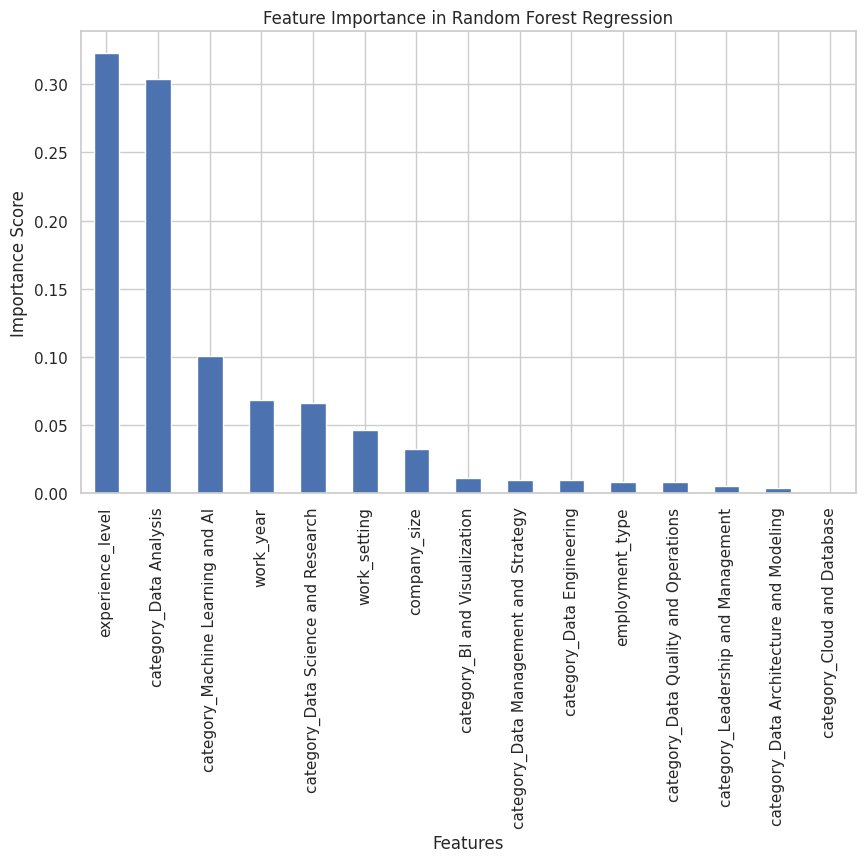

Top 3 features: Index(['experience_level', 'category_Data Analysis',
       'category_Machine Learning and AI'],
      dtype='object')
RMSE with Top 3 Features: 51472.08975251387
R^2 Score with Top 3 Features: 0.2347548692505219


In [ ]:
# Display feature importance from the Random Forest model
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance in Random Forest Regression')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

# Select the top 3 features
top_3_features = feature_importances.nlargest(3).index
print("Top 3 features:", top_3_features)

# Train a new model with the top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

random_forest_top3 = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_top3.fit(X_train_top3, y_train)

y_pred_top3 = random_forest_top3.predict(X_test_top3)
rmse_top3 = np.sqrt(mean_squared_error(y_test, y_pred_top3))
r2_top3 = r2_score(y_test, y_pred_top3)

print("RMSE with Top 3 Features:", rmse_top3)
print("R^2 Score with Top 3 Features:", r2_top3)


# Gradient BOOSTING REGRESSION MODEL

## 1st Iteration:
Steps:

Prepare Data: Split the data into training and testing sets, using salary as the target variable.

Train Model: Use a GBM regression model.

Evaluate Model: Assess its performance using RMSE and R².

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = usd_salary_df.drop('salary', axis=1)
y = usd_salary_df['salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM regression model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Root Mean Squared Error: 50341.34819642685
R² Score: 0.2680074555352997


## 2nd Iteration: Handling Outliers in Salary
Steps:

Modify Data: Replace outliers in the salary column.

Train and Evaluate Model: Using the same steps as the first iteration.

In [ ]:
# Replace outliers in the salary column
usd_salary_df.loc[usd_salary_df['salary'] > 310000, 'salary'] = 310000
y = usd_salary_df['salary']

# Re-split the data (since the target has changed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the GBM model
gbm_model.fit(X_train, y_train)

# Re-predict and re-evaluate
y_pred = gbm_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE with Outlier Adjustment:", rmse)
print("R² Score with Outlier Adjustment:", r2)

RMSE with Outlier Adjustment: 50341.34819642685
R² Score with Outlier Adjustment: 0.2680074555352997


## 3rd Iteration: Feature Importance and Model Simplification
Steps:

Identify Feature Importance: Using model feature importances.

Select Top 3 Features: Based on the highest importances.

Rebuild and Train Model: Using only top features.

Evaluate Model Performance.

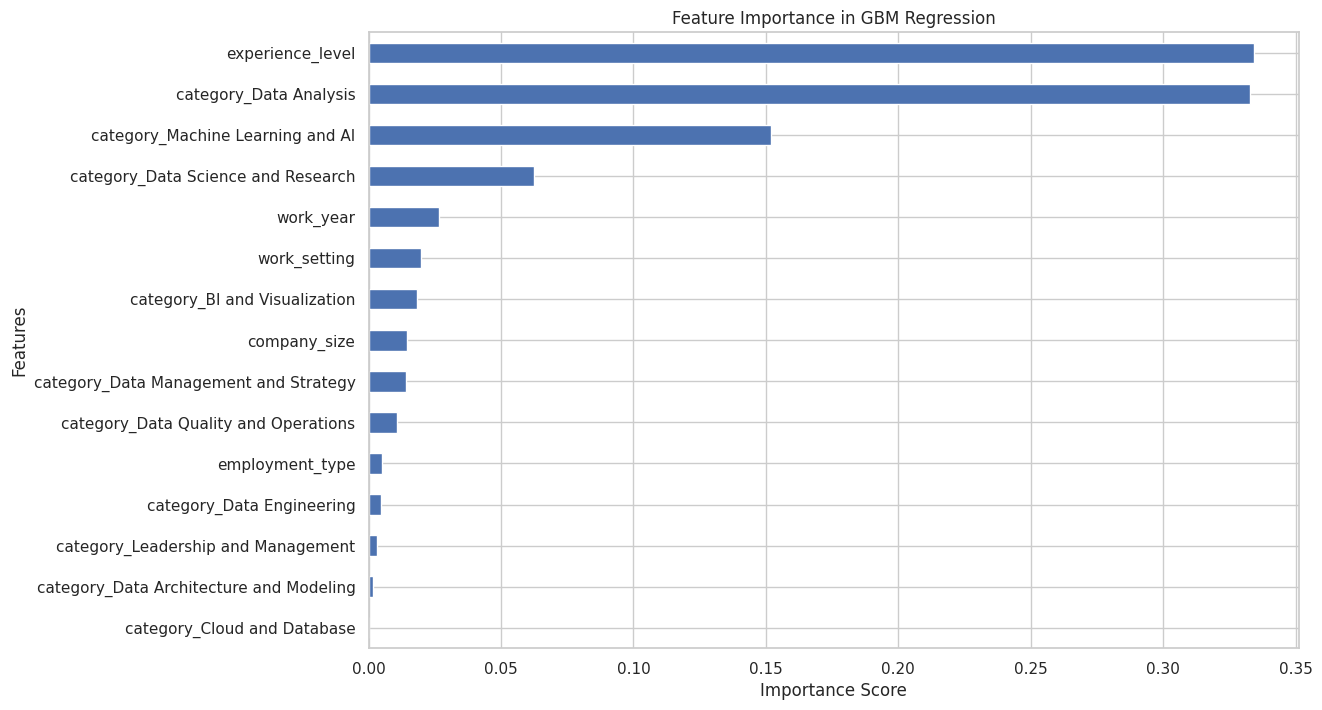

Top 3 features: Index(['experience_level', 'category_Data Analysis',
       'category_Machine Learning and AI'],
      dtype='object')
RMSE with Top 3 Features: 51468.58712375065
R² Score with Top 3 Features: 0.23485901417334965


In [ ]:
# Display feature importance from the GBM model
feature_importances = pd.Series(gbm_model.feature_importances_, index=X_train.columns)

# Plot the feature importances for visual inspection
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance in GBM Regression')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Select top 3 features based on importance
top_3_features = feature_importances.nlargest(3).index
print("Top 3 features:", top_3_features)

# Train a new model with the top 3 features
X_train_top3 = X_train[top_3_features]
X_test_top3 = X_test[top_3_features]

gbm_model_top3 = GradientBoostingRegressor(random_state=42)
gbm_model_top3.fit(X_train_top3, y_train)

# Predict and evaluate with top 3 features
y_pred_top3 = gbm_model_top3.predict(X_test_top3)
rmse_top3 = np.sqrt(mean_squared_error(y_test, y_pred_top3))
r2_top3 = r2_score(y_test, y_pred_top3)

print("RMSE with Top 3 Features:", rmse_top3)
print("R² Score with Top 3 Features:", r2_top3)


# **HYPERPARAMETER TUNING**

## Hyper-tuning the GBM Regression Model

This the best performing modelcompared to the others used in this project

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the GBM regressor
gbm = GradientBoostingRegressor(random_state=42)

# Setup the grid search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Split data into features and target
X = usd_salary_df.drop('salary', axis=1)
y = usd_salary_df['salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best estimator found by grid search
best_gbm = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_gbm.predict(X_test)

# Calculate RMSE and R² Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized RMSE: {rmse}")
print(f"Optimized R² Score: {r2}")

# print out the best parameters found
print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Optimized RMSE: 52888.07754321244
Optimized R² Score: 0.2546949186646855
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.9}


## Hyper-tuning the Lasso Regression Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into features and target
X = usd_salary_df.drop('salary', axis=1)
y = usd_salary_df['salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LASSO regression model
lasso = Lasso(max_iter=10000, random_state=42)

# Define the parameter grid
param_grid = {
    'alpha': np.logspace(-4, 1, 50)  # Generates 50 values between 10^-4 to 10^1
}

# Setup the grid search
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best estimator found by grid search
best_lasso = grid_search.best_estimator_

# Predict on the test set
y_pred = best_lasso.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized RMSE: {rmse}")
print(f"Optimized R² Score: {r2}")
print(f"Best alpha: {best_lasso.alpha}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................................alpha=0.0001; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00012648552168552957; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00012648552168552957; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00012648552168552957; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00012648552168552957; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00012648552168552957; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00015998587196060574; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00015998587196060574; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00015998587196060574; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00015998587196060574; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00015998587196060574; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00020235896477251576; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00020235896477251576; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00020235896477251576; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00020235896477251576; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00020235896477251576; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0002559547922699536; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0002559547922699536; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0002559547922699536; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0002559547922699536; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0002559547922699536; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00032374575428176434; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00032374575428176434; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00032374575428176434; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00032374575428176434; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00032374575428176434; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00040949150623804275; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00040949150623804275; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00040949150623804275; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00040949150623804275; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.00040949150623804275; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0005179474679231213; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0005179474679231213; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0005179474679231213; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0005179474679231213; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.657e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0005179474679231213; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0006551285568595509; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0006551285568595509; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0006551285568595509; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0006551285568595509; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0006551285568595509; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0008286427728546842; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0008286427728546842; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0008286427728546842; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0008286427728546842; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0008286427728546842; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0010481131341546852; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0010481131341546852; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0010481131341546852; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0010481131341546852; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0010481131341546852; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0013257113655901094; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0013257113655901094; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0013257113655901094; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0013257113655901094; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0013257113655901094; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0016768329368110084; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0016768329368110084; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0016768329368110084; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0016768329368110084; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0016768329368110084; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0021209508879201904; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0021209508879201904; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0021209508879201904; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0021209508879201904; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0021209508879201904; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.002682695795279727; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.002682695795279727; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.002682695795279727; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.002682695795279727; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.002682695795279727; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.00339322177189533; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.00339322177189533; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.00339322177189533; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.00339322177189533; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.00339322177189533; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.004291934260128779; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.004291934260128779; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.004291934260128779; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.004291934260128779; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.004291934260128779; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.005428675439323859; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.005428675439323859; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.005428675439323859; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.005428675439323859; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.005428675439323859; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.006866488450042998; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.006866488450042998; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.006866488450042998; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.006866488450042998; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.006866488450042998; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.008685113737513529; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.008685113737513529; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.008685113737513529; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.008685113737513529; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.008685113737513529; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.010985411419875584; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.010985411419875584; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.010985411419875584; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.010985411419875584; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.010985411419875584; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.013894954943731374; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.013894954943731374; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.013894954943731374; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.013894954943731374; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.013894954943731374; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01757510624854793; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01757510624854793; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01757510624854793; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01757510624854793; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01757510624854793; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.022229964825261957; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.022229964825261957; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.022229964825261957; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.022229964825261957; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.022229964825261957; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.028117686979742307; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.028117686979742307; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.028117686979742307; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.028117686979742307; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.028117686979742307; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.03556480306223128; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.03556480306223128; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.03556480306223128; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.03556480306223128; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.03556480306223128; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.04498432668969444; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.04498432668969444; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.04498432668969444; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.04498432668969444; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.04498432668969444; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05689866029018299; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05689866029018299; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05689866029018299; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05689866029018299; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.05689866029018299; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.652e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.07196856730011521; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.634e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.07196856730011521; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.07196856730011521; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.07196856730011521; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.07196856730011521; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.227e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.09102981779915217; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.09102981779915217; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.09102981779915217; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.09102981779915217; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.09102981779915217; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.227e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.11513953993264481; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.11513953993264481; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.11513953993264481; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.11513953993264481; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.11513953993264481; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.14563484775012445; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.14563484775012445; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.14563484775012445; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.14563484775012445; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.14563484775012445; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.18420699693267165; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.18420699693267165; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+12, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.18420699693267165; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.18420699693267165; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.18420699693267165; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e+12, tolerance: 2.760e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.2329951810515372; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+12, tolerance: 2.789e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.2329951810515372; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+10, tolerance: 2.820e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.2329951810515372; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+12, tolerance: 2.787e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.2329951810515372; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+12, tolerance: 2.809e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.2329951810515372; total time=   1.8s
[CV] END ..........................alpha=0.29470517025518095; total time=   1.5s
[CV] END ..........................alpha=0.29470517025518095; total time=   1.6s
[CV] END ..........................alpha=0.29470517025518095; total time=   1.5s
[CV] END ..........................alpha=0.29470517025518095; total time=   1.6s
[CV] END ..........................alpha=0.29470517025518095; total time=   2.5s
[CV] END ...........................alpha=0.3727593720314942; total time=   2.0s
[CV] END ...........................alpha=0.3727593720314942; total time=   1.2s
[CV] END ...........................alpha=0.3727593720314942; total time=   1.3s
[CV] END ...........................alpha=0.3727593720314942; total time=   1.3s
[CV] END ...........................alpha=0.3727593720314942; total time=   1.1s
[CV] END ..........................alpha=0.47148663634573945; total time=   0.8s
[CV] END ...................

## DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

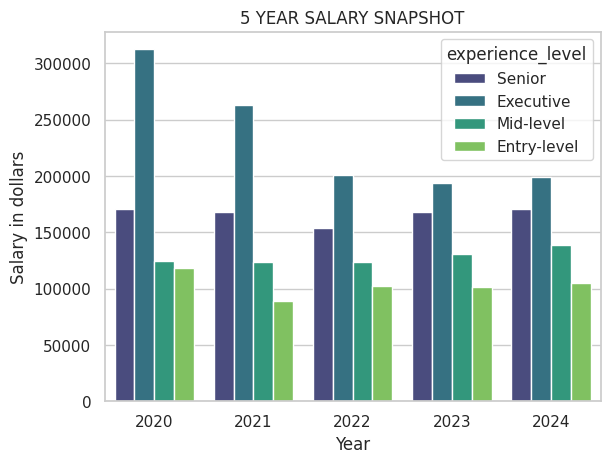

In [ ]:
#Shows the average/mean amount of salary based on year with color for experience_level
bar=sns.barplot(data=df_u,x='work_year',y='salary',hue='experience_level',palette='viridis',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Salary in dollars')
plt.title('5 YEAR SALARY SNAPSHOT')
plt.savefig('/content/salary_snapshot')

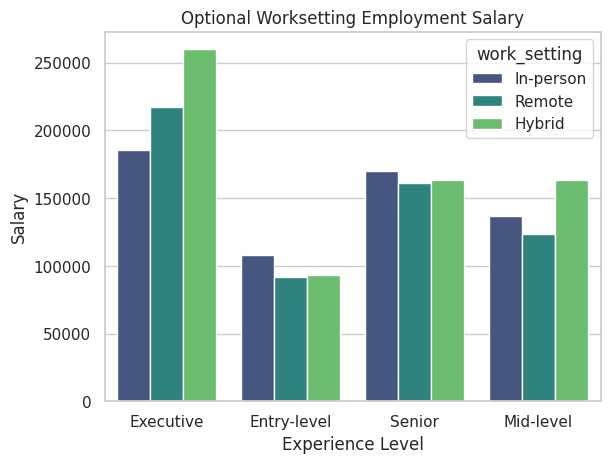

In [ ]:
#Shows the average/mean salary by experience level with color for work setting
sns.barplot(data=df_u,y='salary',hue='work_setting',x='experience_level',palette='viridis',errorbar=None)
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Optional Worksetting Employment Salary')
plt.savefig('/content/worksetting_experience')

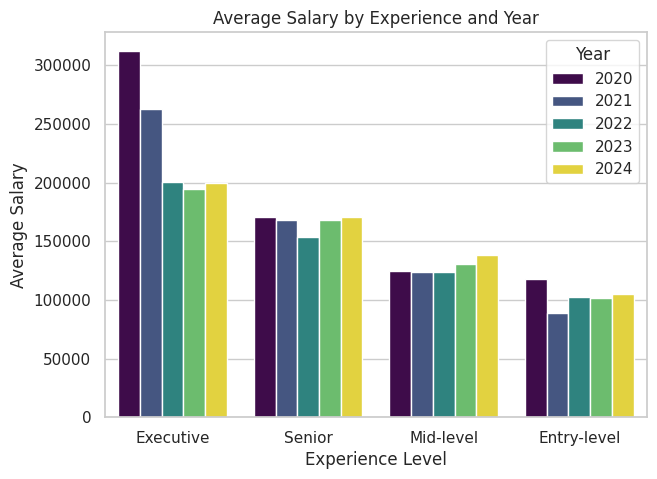

In [ ]:
#show average/mean salary by experience level with color showing each year comparision

orderlist=['Executive','Senior','Mid-level','Entry-level']
fig=plt.figure(figsize=(7,5))
a=sns.barplot(data=df_u,x='experience_level',y='salary',hue='work_year',
            dodge=True,errorbar=None,palette='viridis',order=orderlist)
a.set(xlabel="Experience Level",ylabel="Average Salary",title='Average Salary by Experience and Year')
#a.title.set_size(15)
sns.move_legend(a,'upper right',title='Year')
plt.savefig('/content/Ordered Experience with Year')


<Figure size 1500x1500 with 0 Axes>

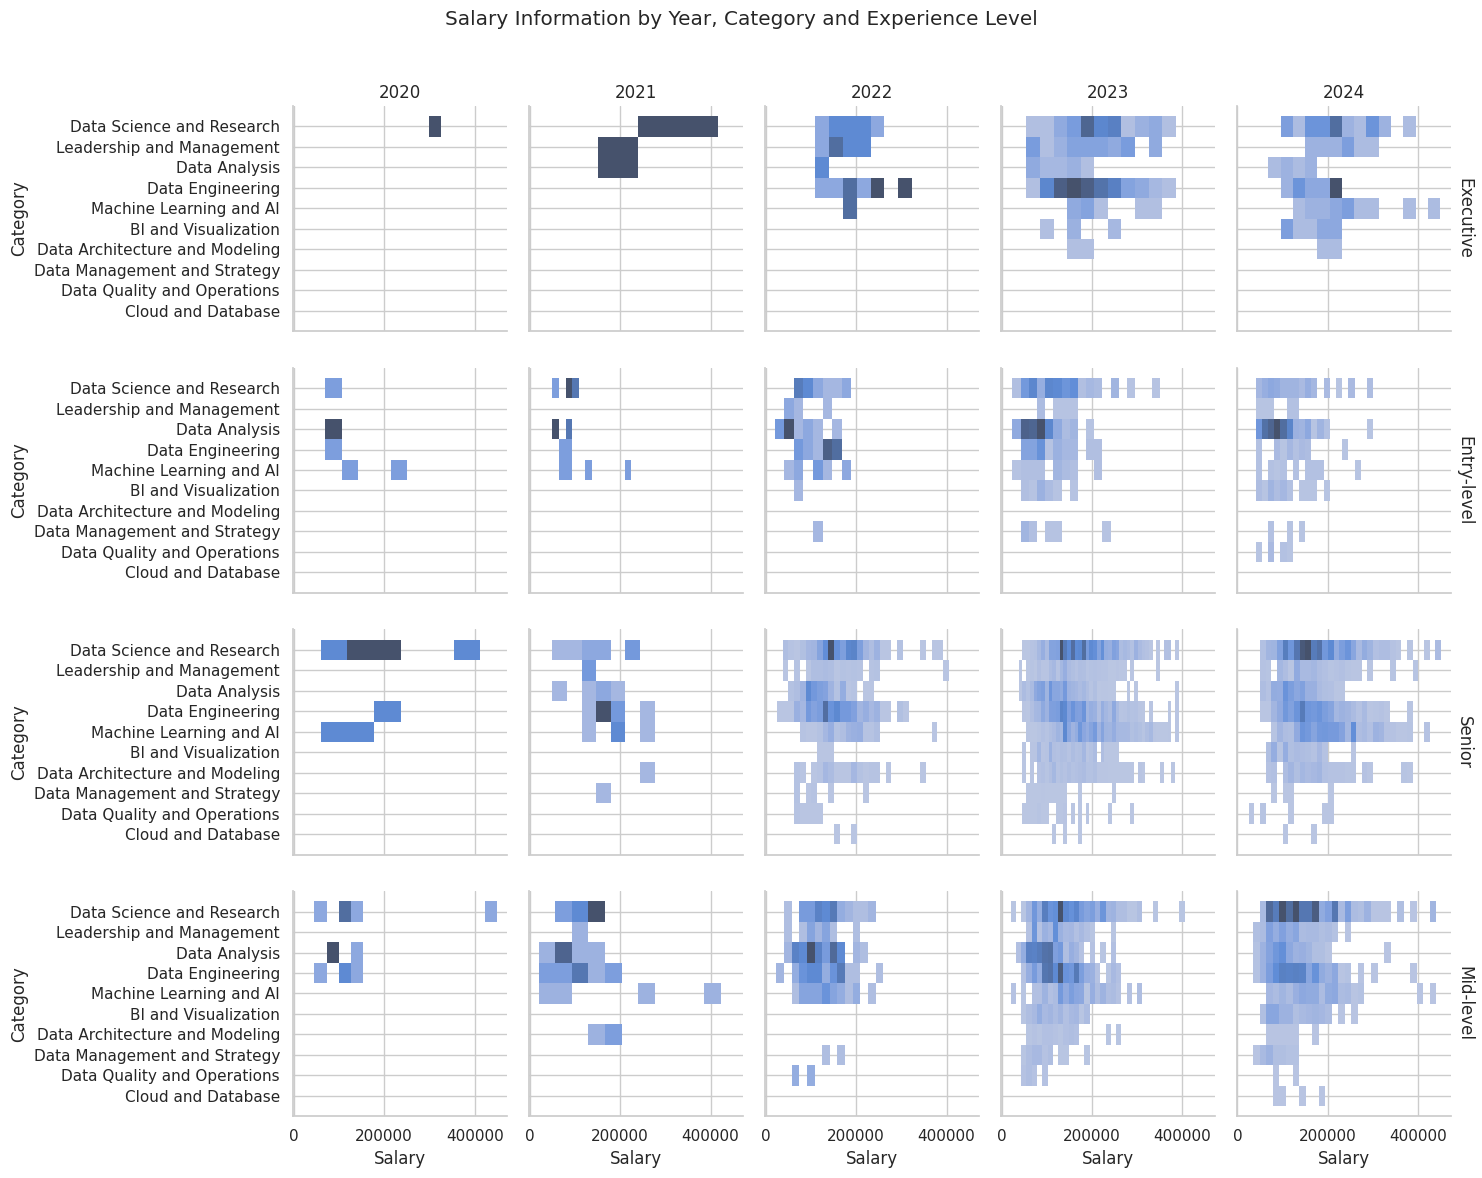

In [ ]:
fig=plt.figure(figsize=(15,15))
h=sns.FacetGrid(data=df_u,col='work_year',row='experience_level',
             palette='viridis',margin_titles=True)
h.map(sns.histplot,'salary','job_category')
h.set_titles(col_template="{col_name}",row_template="{row_name}")
h.set_axis_labels('Salary','Category')
h.fig.suptitle("Salary Information by Year, Category and Experience Level")
h.fig.subplots_adjust(top=.9)
plt.savefig('/content/YearSalaryCategoryExperience')


<Figure size 2000x1500 with 0 Axes>

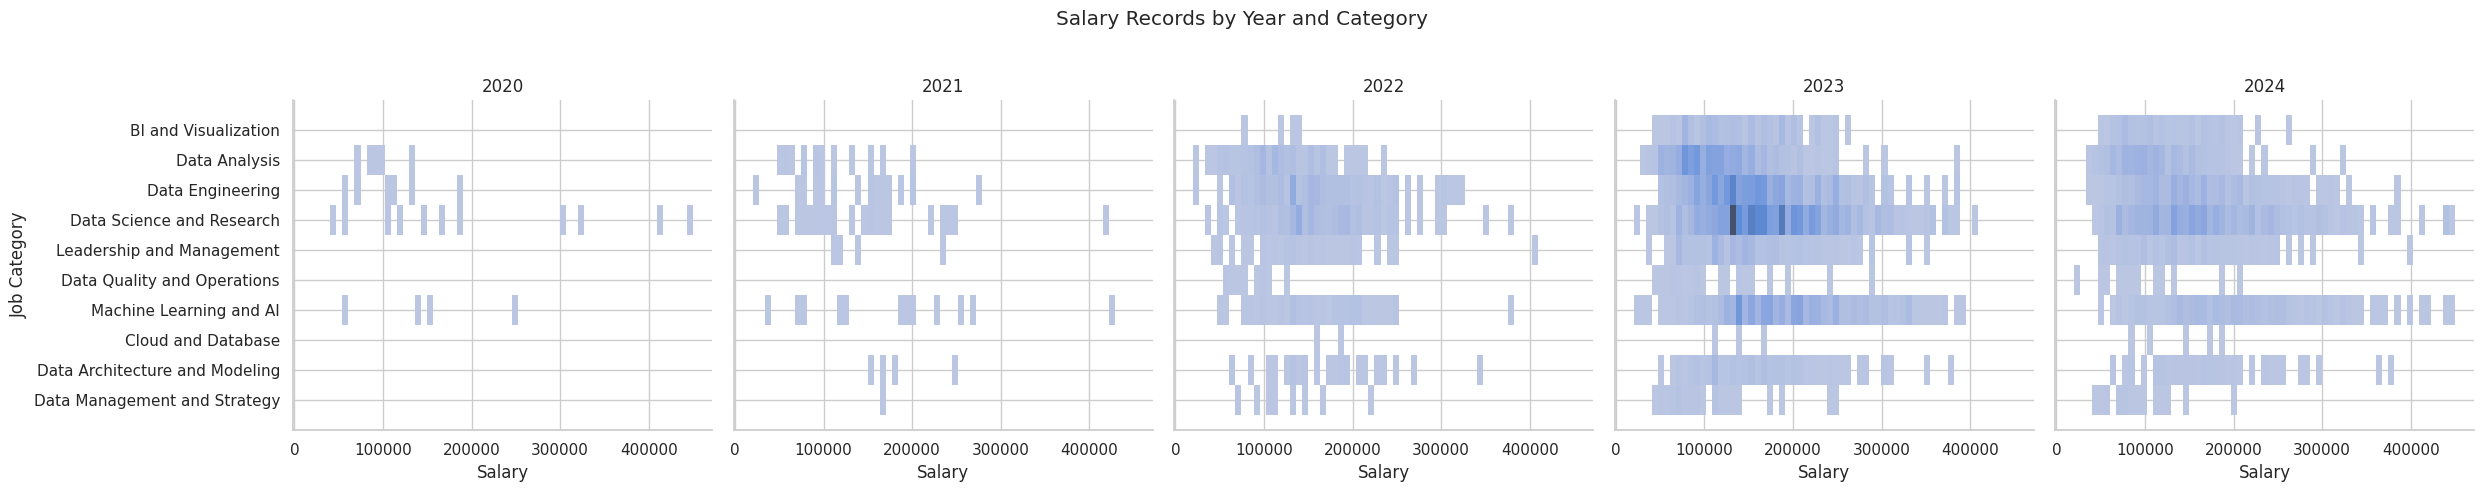

In [ ]:
fig=plt.figure(figsize=(20,15))
b=sns.displot(data=df_u,x='salary',y='job_category',col='work_year')
b.set_titles(("{col_name}"))
b.set_axis_labels("Salary","Job Category")
b.tight_layout()
b.fig.subplots_adjust(top=.8)
b.fig.suptitle("Salary Records by Year and Category")
plt.savefig('/content/SalaryRecordsByYearAndCategory')


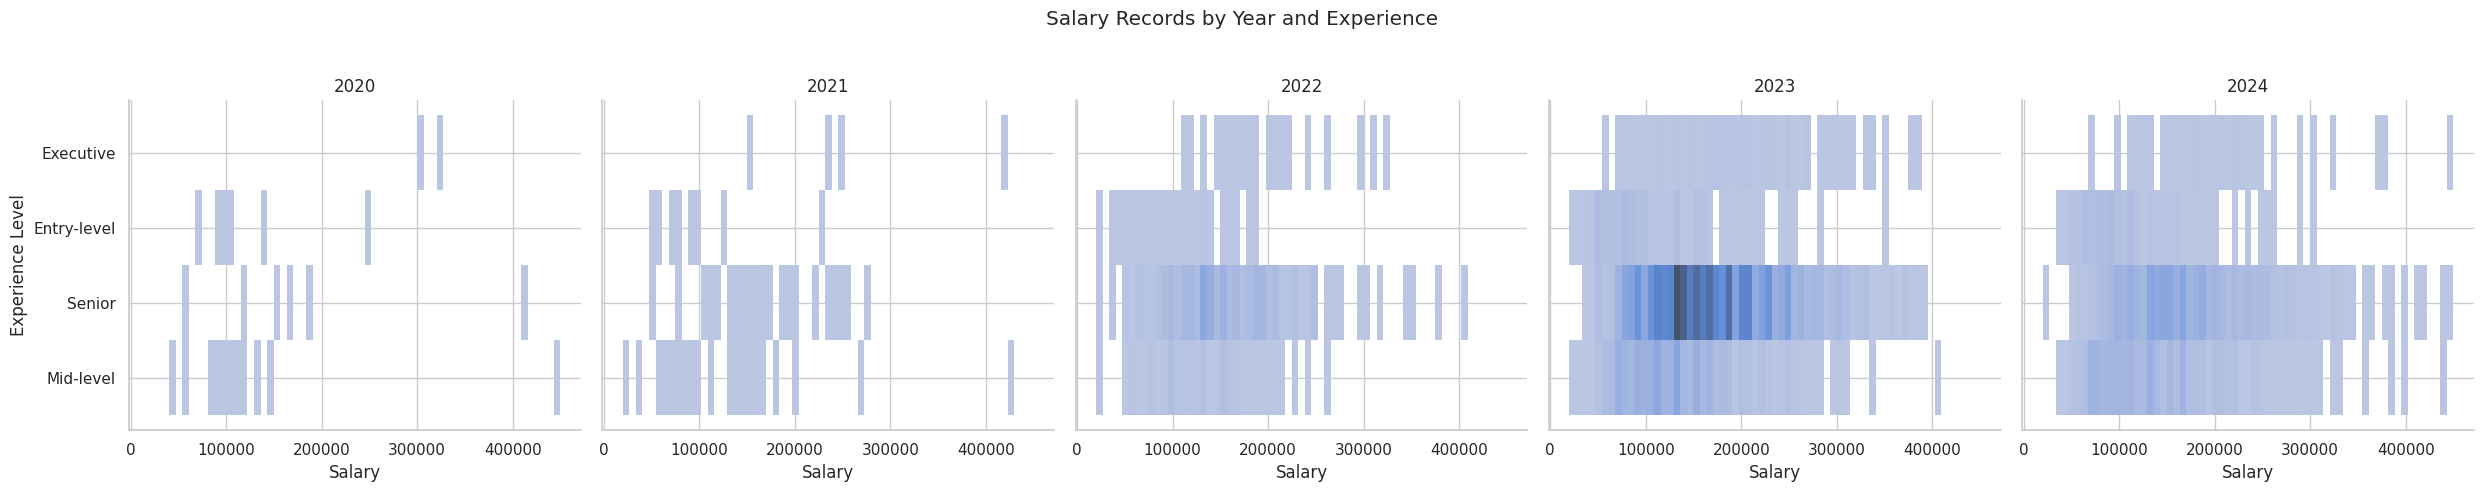

In [ ]:
f=sns.displot(data=df_u,x='salary',y='experience_level',col='work_year')
f.set_titles(("{col_name}"))
f.set_axis_labels("Salary","Experience Level")
f.tight_layout()
f.fig.subplots_adjust(top=.8)
f.fig.suptitle("Salary Records by Year and Experience")
plt.savefig('/content/SalaryRecordsByYearAndExp')

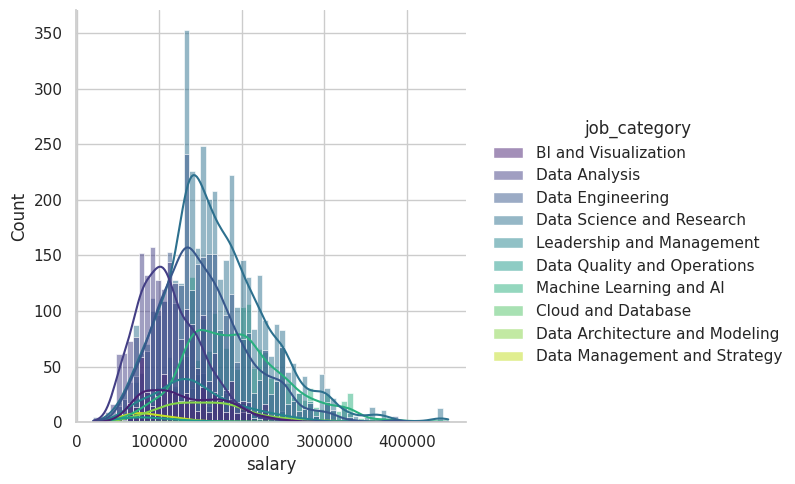

In [ ]:
sns.displot(data=df_u,x='salary',hue='job_category',kde=True,palette='viridis')

<Axes: xlabel='work_year', ylabel='count'>

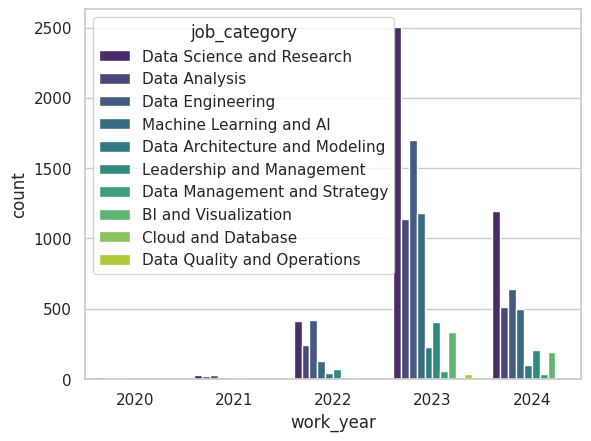

In [ ]:
sns.countplot(data=df_u,x='work_year',hue='job_category',stat='count',palette='viridis')

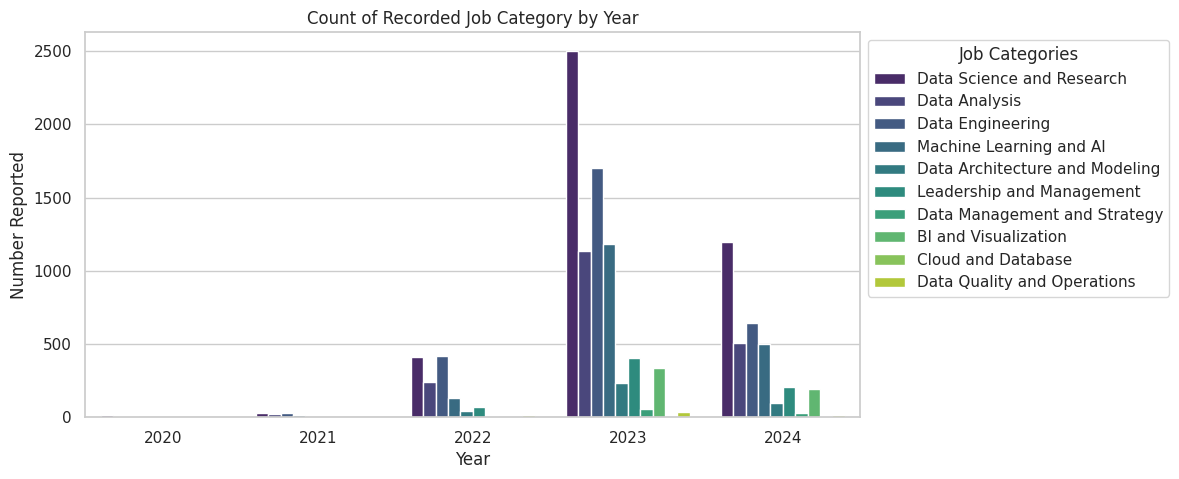

In [ ]:
fig=plt.figure(figsize=(10,5))
jobcategorycount=sns.countplot(data=df_u,x='work_year',hue='job_category',palette='viridis')
jobcategorycount.set(xlabel='Year',ylabel='Number Reported',title='Count of Recorded Job Category by Year')
sns.move_legend(jobcategorycount,'upper left',bbox_to_anchor=(1,1),title='Job Categories')
plt.savefig('/content/CountCategoryByYear')

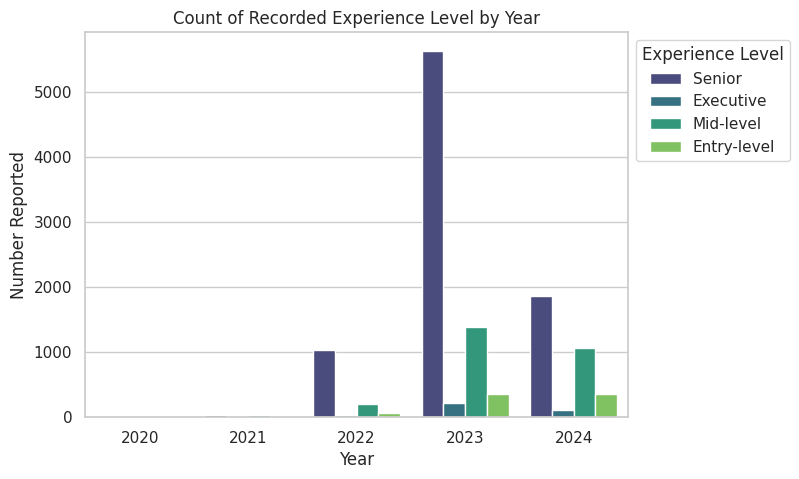

In [ ]:
fig=plt.figure(figsize=(7,5))
exp=sns.countplot(data=df_u,x='work_year',hue='experience_level',palette='viridis')
exp.set(xlabel='Year',ylabel='Number Reported',title='Count of Recorded Experience Level by Year')
sns.move_legend(exp,'upper left',bbox_to_anchor=(1,1),title='Experience Level')
plt.savefig('/content/countexp')

In [ ]:
|

SyntaxError: invalid syntax (<ipython-input-46-4b37ef281455>, line 1)